# Qiskit 可視化ツール
Qiskitで提供されている可視化ツールについて説明します。例として、2量子ビットのベル状態を作ります。

In [1]:
from qiskit import *
# quantum circuit to make a Bell state 
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])
circ = bell.compose(meas)

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 485, '11': 515}


## ヒストグラムのプロット <a name='histogram'></a>
実デバイスまたは `qasm_simulator` 上で実行された結果を、シンプルに可視化するのが `plot_histogram()` メソッドです。

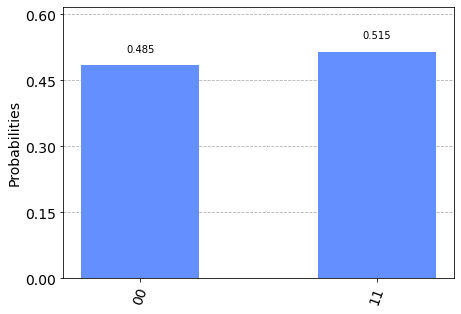

In [2]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### `plot_histogram` のオプション

- `legend` : 凡例
- `sort` : ヒストグラムの描画順番 ( `asc` もしくは `dsc` ) 
- `number_to_keep` : 表示する項目数 (それ以外は rest に集約)
- `color` : ヒストグラムの配色
- `bar_labels` : バーの上にラベルを表示するか否か 
- `figsize` : 出力図形のサイズ (インチ)

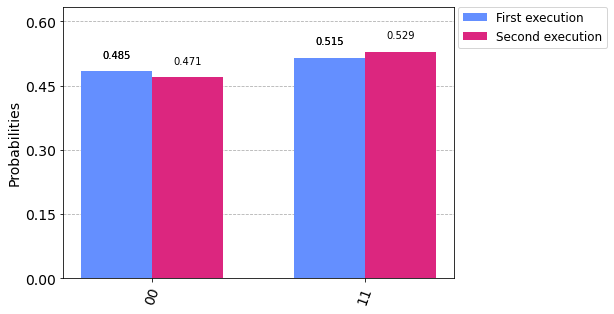

In [3]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

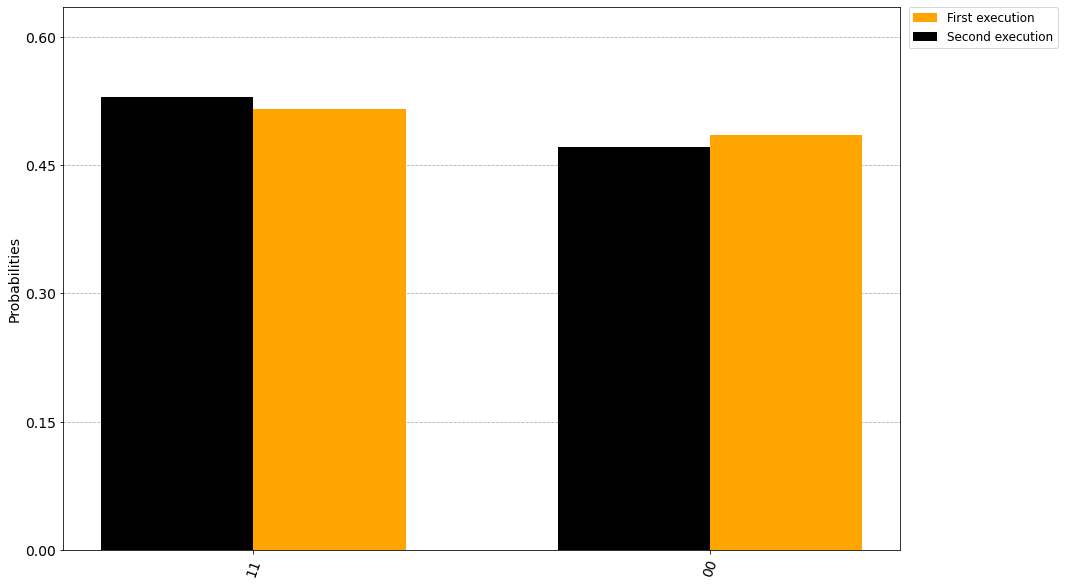

In [4]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,10), 
               color=['orange', 'black'], bar_labels=False)

### `plot_histogram` の返り値の使用

視覚化のために `plot_histogram` メソッドの返り値は `matplotlib.Figure` クラスです。Jupyter notebook は返り値の型を理解するので、このチュートリアルでは表示されますが、それ以外で実行する場合にはこの機能は自動的には使えません。`matplotlib.Figure` クラスの以下のメソッドを呼び出して、視覚化してください。
- `show()` : 図を新しいウィンドウで表示 (matplotlib バックエンドをインタラクティブに設定している場合)
- `savefig('out.png')` : 指定したパスに図を保存

## 量子状態のプロット <a name='state'></a>

デバッグ用途などで、量子状態を見たいことがあるでしょう。Qiskitはさまざまなタイプの可視化ツールを用意しています。ただし、量子状態の可視化には指数関数的なリソースが必要になるため、小さな量子システムの状態表示までに留めてください。

量子状態は、密度行列 $\rho$ (エルミート行列) または状態ベクトル $|\psi\rangle$ (複素ベクトル)で記述されます。密度行列と状態ベクトルは次式の関係にあります。

$$\rho = |\psi\rangle\langle \psi| $$

そして、混合状態で表すのが、より一般的です。

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k | $$

関数によって生成される可視化は、以下のとおりです:

- `'plot_state_city'`: 状態行列の実部と虚部が都市のようにプロットされている、量子状態の標準的なビュー。

- `'plot_state_qsphere'`: 状態ベクトルの振幅と位相が球体にプロットされる、量子状態のQiskit独自ビュー。振幅は矢印の太さ、位相は色で表現されます。混合状態では、各コンポーネントが異なる `'qsphere'` で表示されます。

- `'plot_state_qsphere'`: $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$ を基底としたパウリ演算子による状態行列の表現。

- `'plot_state_hinton'`: `'city'` と同様だが、要素の大きさは行列要素の値を表す。

- `'plot_bloch_multivector'`: 量子状態を単一量子ビット空間へ射影し、ブロッホ球上にプロットする。

### 準備

In [5]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

`'plot_state_city'`: 密度行列 $\rho$ の実部と虚部が都市のようにプロットされている、量子状態の標準的なビュー。

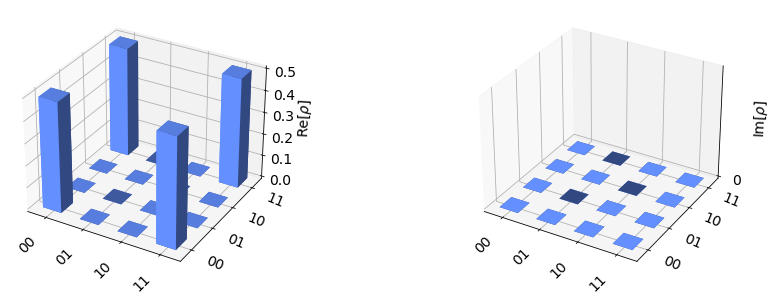

In [6]:
plot_state_city(psi)

`'plot_state_hinton'`: `'plot_state_city'` と同じですが、要素の大きさが行列要素の値を表します

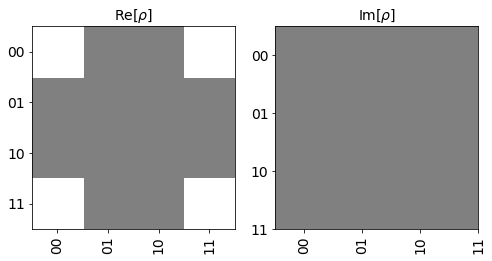

In [7]:
plot_state_hinton(psi)

`'plot_state_qsphere'`: 状態ベクトルの振幅と位相が球体にプロットされる、Qiskitの独自ビュー。振幅はポインタの大きさ、位相は色で表現されます。

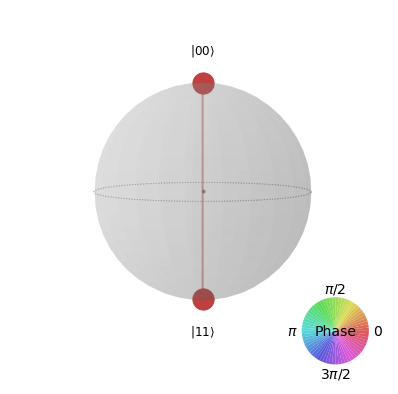

In [8]:
plot_state_qsphere(psi)

`'plot_state_paulivec'`: $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$ を基底としたパウリ演算子による状態行列の表現

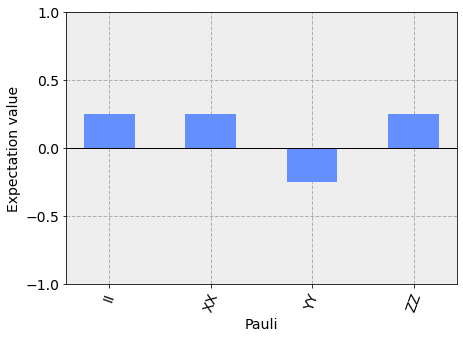

In [9]:
plot_state_paulivec(psi)

`'plot_bloch_multivector'`: 量子状態を単一量子ビット空間へ射影し、ブロッホ球上にプロットします

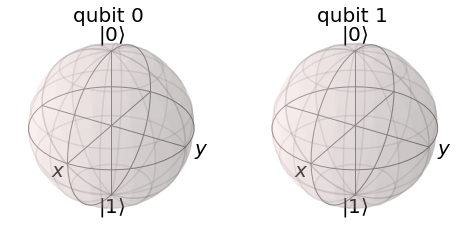

In [10]:
plot_bloch_multivector(psi)

すべてのベクトルがゼロであるため、単一量子ビット空間内には、量子状態に関する情報がないことがわかります。

### 量子状態をプロットするときのオプション

量子状態をプロットするためのさまざまなメソッドは、それぞれプロットを調整する多くのオプションがあります。 たくさんあるので、見ておいてください。

**plot_state_city()** オプション

- **title** (str): プロットのタイトルを表す文字列
- **figsize** (tuple): 図のサイズ。単位はインチ (幅, 高さ)
- **color** (list): 行列要素の実部と虚部の色を指定する、長さ2のリスト

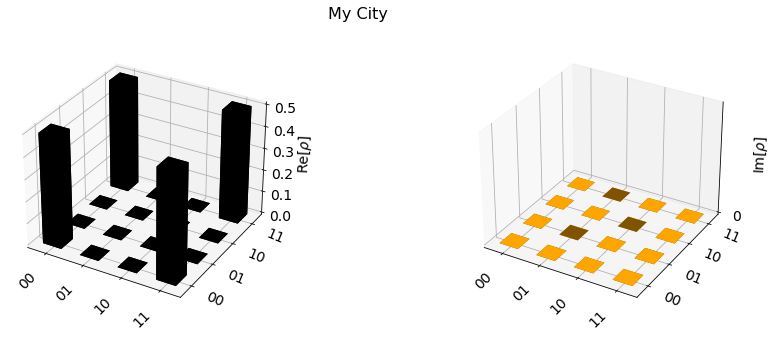

In [11]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

**plot_state_hinton()** オプション

- **title** (str): プロットのタイトルを表す文字列
- **figsize** (tuple): 図のサイズ。単位はインチ (幅, 高さ).

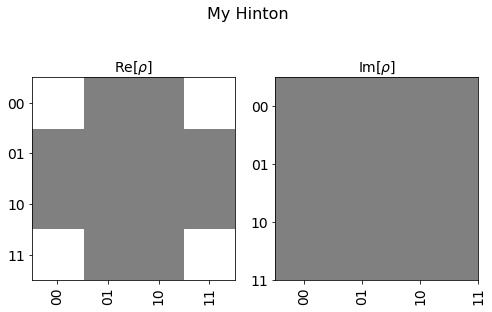

In [12]:
plot_state_hinton(psi, title="My Hinton")

**plot_state_paulivec()** オプション

- **title** (str): プロットのタイトルを表す文字列
- **figsize** (tuple): 図のサイズ。単位はインチ (幅, 高さ)
- **color** (list または str): 期待値バーの色

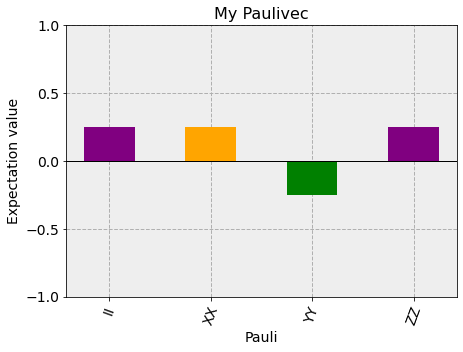

In [13]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

**plot_state_qsphere()** オプション

- **figsize** (tuple): 図のサイズ。単位はインチ (幅, 高さ)

**plot_bloch_multivector()** オプション

- **title** (str): プロットのタイトルを表す文字列
- **figsize** (tuple): 図のサイズ。単位はインチ (幅, 高さ)。

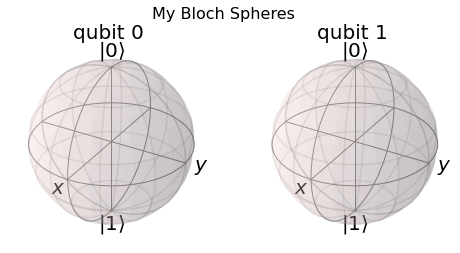

In [14]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

### 状態プロット関数からの出力の使用

視覚化のために plot_histogram() 関数を呼び出した場合の返り値は `matplotlib.Figure` です。Jupyter notebook は返り値の型を理解するので、このチュートリアルでは表示されますが、Jupyter 以外で実行する場合にはこの機能は自動的には使えません。`matplotlib.Figure` クラス自体は視覚化されたものを表示、保存する機能をもともと持っています。plot_histogram() から返されたオブジェクトに対して `.show()` を呼び出すとイメージが新しいウィンドウで開きます (このときmatplotlib バックエンドをインタラクティブに設定していることを想定) 。あるいは `.savefig('out.png')` で 図を `out.png` に保存できます。 `savefig()` メソッドはパスを引数に取り、保存しようとしている図の場所やファイル名を指定できます。

## ブロッホ・ベクトルのプロット<a name='bloch'></a>

ブロッホ・ベクトル(次式)を使用して、量子状態をプロットすることができます。
$$[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$$
ここで、$X$ 、 $Y$ 、 $Z$ は単一量子ビットのパウリ演算子、$\rho$ は状態行列です。ただし、この方法は単一の量子ビットにしか適用できません。

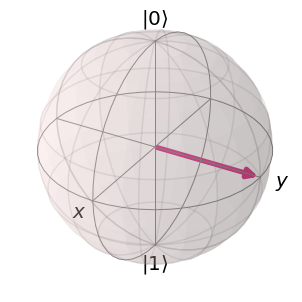

In [15]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,1,0], figsize=(4,4))

### plot_bloch_vector() のオプション

- **title** (str): プロットのタイトルを表す文字列
- **figsize** (tuple): 図のサイズ。単位はインチ (幅, 高さ)

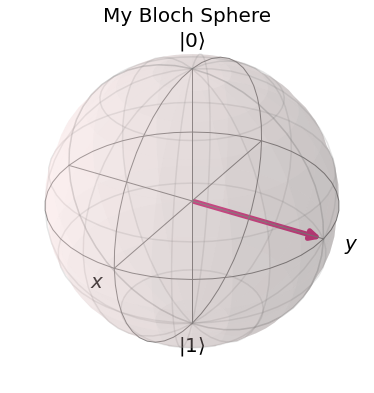

In [16]:
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

### plot_bloch_vector() の出力の調整

視覚化のために `plot_bloch_vector` 関数を呼び出した場合の返り値は `matplotlib.Figure` です。Jupyter notebook は返り値の型を理解するので、このチュートリアルでは表示されますが、Jupyter 以外で実行する場合にはこの機能は自動的には使えません。`matplotlib.Figure` クラス自体は視覚化されたものを表示、保存する機能をもともと持っています。返されたオブジェクトに対して `.show()` を呼び出すとイメージが新しいウィンドウで開きます (このときmatplotlib バックエンドをインタラクティブに設定していることを想定) 。あるいは `.savefig('out.png')` で 図を `out.png` に保存できます。 `savefig()` メソッドはパスを引数に取り、保存しようとしている図の場所やファイル名を指定できます。

In [17]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright